In [ ]:
#importing all the necessary libraries
import zipfile
from pathlib import Path
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os, pathlib
data_path = pathlib.Path('/content/drive/MyDrive/cats_vs_dogs_small')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Configure image augmentation to enhance data variability
augmenter = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

**Answer 1: Define and Train Model from Scratch with 1000 Images**


In [ ]:
def initialize_scratch_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation="relu", input_shape=(180, 180, 3)),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(128, (3, 3), activation="relu"),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(512, activation="relu"),
        layers.Dense(1, activation="sigmoid")
    ])
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

In [ ]:
# Dataset loading with specified splits
train_dataset = image_dataset_from_directory(
    data_path / "train",
    image_size=(180, 180),
    batch_size=32,
    shuffle=True,
    seed=42,
    subset="training",
    validation_split=0.5
)

validation_dataset = image_dataset_from_directory(
    data_path / "validation",
    image_size=(180, 180),
    batch_size=32
)

test_dataset = image_dataset_from_directory(
    data_path / "test",
    image_size=(180, 180),
    batch_size=32
)


Found 2000 files belonging to 2 classes.
Using 1000 files for training.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
# Initialize and train model
scratch_model = initialize_scratch_model()

# Data Augmentation
augmentation_layer = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])
augmented_train = train_dataset.map(lambda x, y: (augmentation_layer(x), y))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


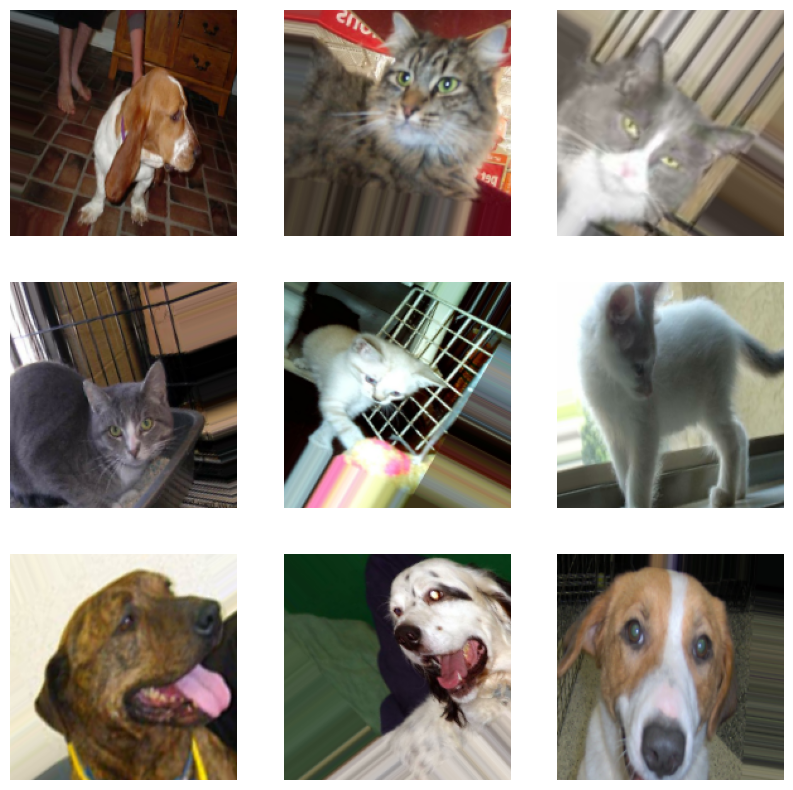

In [ ]:
# Display a few augmented images
for images, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        augmented_img = augmenter.random_transform(images[i].numpy().astype("uint8"))
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_img)
        plt.axis("off")
    plt.show()

In [ ]:
# Train the model with augmented data
history_scratch_1000 = scratch_model.fit(
    augmented_train,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.ModelCheckpoint("scratch_model_1000.keras", save_best_only=True)]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 382s 12s/step - accuracy: 0.5195 - loss: 35.1856 - val_accuracy: 0.5130 - val_loss: 0.6931
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 374ms/step - accuracy: 0.5205 - loss: 0.6994 - val_accuracy: 0.4930 - val_loss: 0.6928
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 23s 466ms/step - accuracy: 0.4965 - loss: 0.6936 - val_accuracy: 0.5110 - val_loss: 0.6967
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 469ms/step - accuracy: 0.5324 - loss: 0.6886 - val_accuracy: 0.4990 - val_loss: 0.7199
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 15s 473ms/step - accuracy: 0.5051 - loss: 0.6941 - val_accuracy: 0.4890 - val_loss: 0.6932
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 18s 387ms/step - accuracy: 0.5040 - loss: 0.6932 - val_accuracy: 0.4970 - val_loss: 0.6931
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 373ms/step - accuracy: 0.5079 - loss: 0.6926 - val_accuracy: 0.4990 - val_loss: 0.6931
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 24s 472ms/step - accuracy: 0.4945 - loss: 0.6927 - val_accu

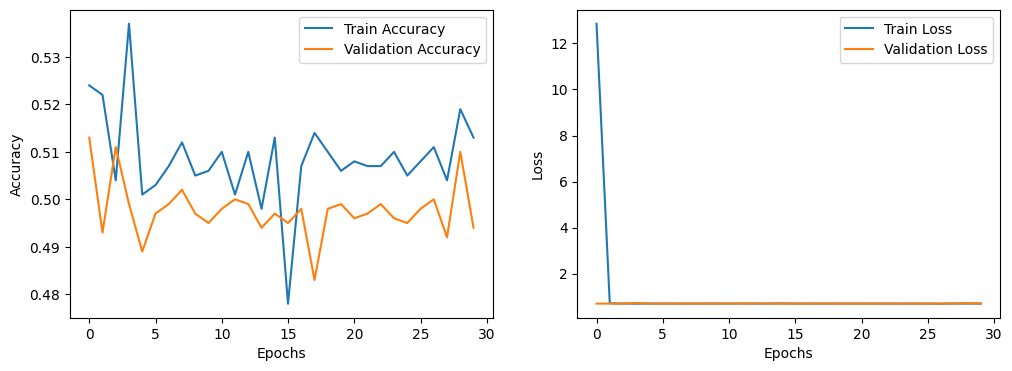

In [ ]:
# Plotting training and validation metrics
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_scratch_1000.history["accuracy"], label="Train Accuracy")
plt.plot(history_scratch_1000.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_scratch_1000.history["loss"], label="Train Loss")
plt.plot(history_scratch_1000.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = scratch_model.evaluate(test_dataset)
print(f"Step 1 - Accuracy on test data: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 247s 8s/step - accuracy: 0.5106 - loss: 0.6961
Step 1 - Accuracy on test data: 0.502


**Step 2:  Retrain with Additional Augmentation**




In [ ]:
augmentation_layer = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
])

In [ ]:
# Reinitialize and retrain model
model_with_augmentation = keras.Sequential([
    augmentation_layer,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compiling the model
model_with_augmentation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Retraining the model with data augmentation using the same training dataset.history_augmentation = model_with_augmentation.fit(
history_augmentation = model_with_augmentation.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath="model_augmented.keras", save_best_only=True, monitor="val_loss")]
)


Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 222ms/step - accuracy: 0.5028 - loss: 0.7019 - val_accuracy: 0.5880 - val_loss: 0.6903
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 270ms/step - accuracy: 0.5504 - loss: 0.6900 - val_accuracy: 0.5290 - val_loss: 0.6920
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 182ms/step - accuracy: 0.5161 - loss: 0.6912 - val_accuracy: 0.5200 - val_loss: 0.6976
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - accuracy: 0.5151 - loss: 0.6899 - val_accuracy: 0.5300 - val_loss: 0.6934
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 196ms/step - accuracy: 0.5566 - loss: 0.6846 - val_accuracy: 0.5480 - val_loss: 0.7095
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.5794 - loss: 0.6821 - val_accuracy: 0.6140 - val_loss: 0.6715
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.6141 - loss: 0.6728 - val_accuracy: 0.5840 - val_loss: 0.6822
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 292ms/step - accuracy: 0.5116 - loss: 0.6874 - val_accurac

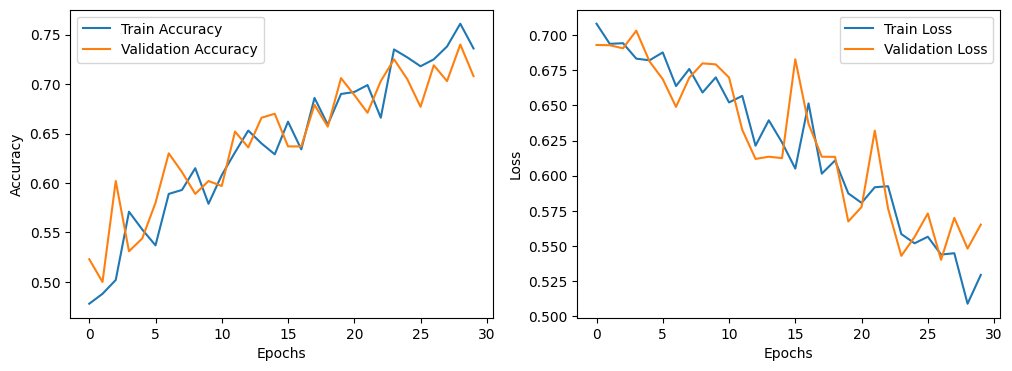

In [ ]:
# Step 2 Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_augmentation.history["accuracy"], label="Train Accuracy")
plt.plot(history_augmentation.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_augmentation.history["loss"], label="Train Loss")
plt.plot(history_augmentation.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Evaluating the model on the test set
test_loss, test_acc = model_with_augmentation.evaluate(test_dataset)
print(f"Step 2 - Test accuracy with data augmentation: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 127ms/step - accuracy: 0.6932 - loss: 0.6210
Step 2 - Test accuracy with data augmentation: 0.681


**Answer 3:  Further Optimize Model**

In [ ]:
# Re-create the model with slight adjustments to complexity
model_with_more_augmentation = keras.Sequential([
    augmentation_layer,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


In [ ]:
# Compiling the model
model_with_more_augmentation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history_optimized = model_with_more_augmentation.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    batch_size=16,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath="model_optimized.keras", save_best_only=True, monitor="val_loss")]
)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 275ms/step - accuracy: 0.4881 - loss: 0.8204 - val_accuracy: 0.5000 - val_loss: 0.6938
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.5159 - loss: 0.6945 - val_accuracy: 0.5000 - val_loss: 0.6922
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 230ms/step - accuracy: 0.5270 - loss: 0.6925 - val_accuracy: 0.5020 - val_loss: 0.6922
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 186ms/step - accuracy: 0.5049 - loss: 0.6927 - val_accuracy: 0.5000 - val_loss: 0.6978
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 237ms/step - accuracy: 0.5049 - loss: 0.6931 - val_accuracy: 0.5300 - val_loss: 0.6867
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 211ms/step - accuracy: 0.5497 - loss: 0.6840 - val_accuracy: 0.5270 - val_loss: 0.6883
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 235ms/step - accuracy: 0.5725 - loss: 0.6836 - val_accuracy: 0.5820 - val_loss: 0.6719
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 229ms/step - accuracy: 0.5830 - loss: 0.6696 - val_accuracy: 

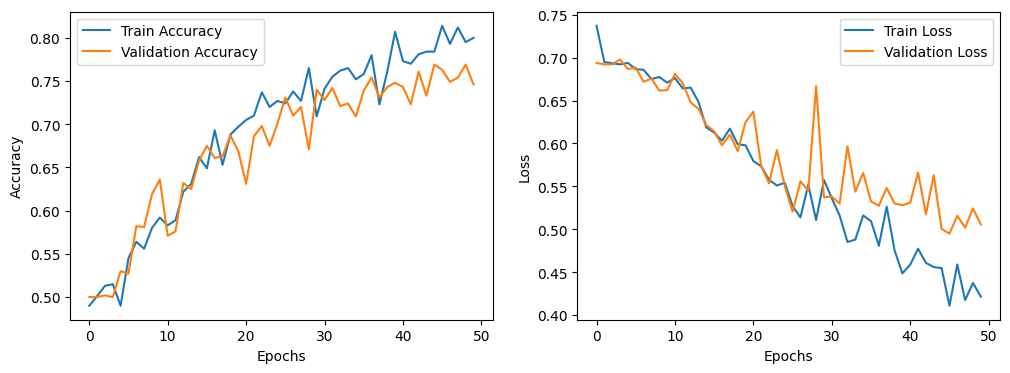

In [ ]:
# Step 3 Plot Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_optimized.history["accuracy"], label="Train Accuracy")
plt.plot(history_optimized.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_optimized.history["loss"], label="Train Loss")
plt.plot(history_optimized.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model_with_more_augmentation.evaluate(test_dataset)
print(f"Step 3 - Optimized model test accuracy: {test_acc:.3f}")


32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - accuracy: 0.7579 - loss: 0.5156
Step 3 - Optimized model test accuracy: 0.757


**Answer 4: Pretrained Model with VGG16**


In [ ]:
from tensorflow.keras.applications import VGG16

from tensorflow.keras.applications import VGG16

vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(180, 180, 3))
vgg_base.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Creating a new model with the pretrained base
pretrained_vgg_model = keras.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
# Compiling the model
pretrained_vgg_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the model with the same dataset as before
history_pretrained = pretrained_vgg_model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=[keras.callbacks.ModelCheckpoint(filepath="pretrained_vgg.keras", save_best_only=True, monitor="val_loss")]
)

Epoch 1/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 444ms/step - accuracy: 0.7058 - loss: 19.6704 - val_accuracy: 0.9360 - val_loss: 1.2392
Epoch 2/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 21s 290ms/step - accuracy: 0.9485 - loss: 1.1910 - val_accuracy: 0.9540 - val_loss: 0.4757
Epoch 3/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.9792 - loss: 0.1656 - val_accuracy: 0.9460 - val_loss: 0.4753
Epoch 4/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 264ms/step - accuracy: 0.9783 - loss: 0.1165 - val_accuracy: 0.9460 - val_loss: 0.4653
Epoch 5/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.9819 - loss: 0.1746 - val_accuracy: 0.9510 - val_loss: 0.4801
Epoch 6/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 232ms/step - accuracy: 0.9937 - loss: 0.0516 - val_accuracy: 0.9420 - val_loss: 0.4501
Epoch 7/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 293ms/step - accuracy: 0.9979 - loss: 0.0256 - val_accuracy: 0.9460 - val_loss: 0.4388
Epoch 8/30
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 257ms/step - accuracy: 0.9941 - loss: 0.0293 - val_accuracy

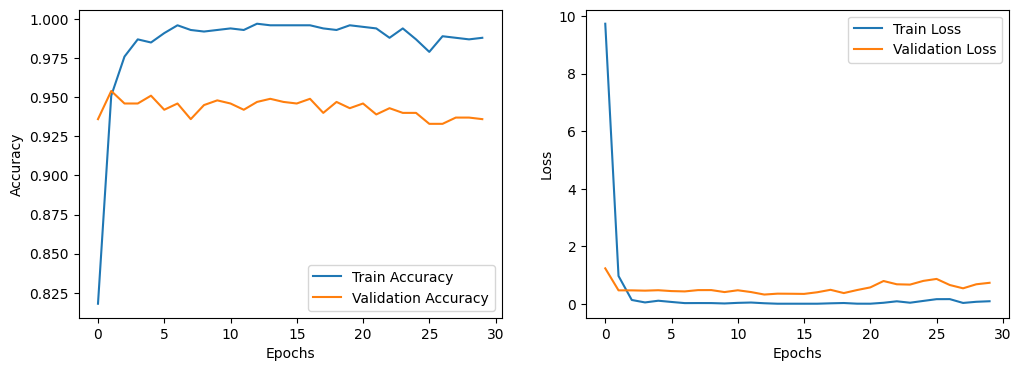

In [ ]:
# Step 4 Plotting Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_pretrained.history["accuracy"], label="Train Accuracy")
plt.plot(history_pretrained.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt

plt.subplot(1, 2, 2)
plt.plot(history_pretrained.history["loss"], label="Train Loss")
plt.plot(history_pretrained.history["val_loss"], label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = pretrained_vgg_model.evaluate(test_dataset)
print(f"Step 4 - Test accuracy with pretrained model: {test_acc:.3f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9446 - loss: 0.4536
Step 4 - Test accuracy with pretrained model: 0.942


<Figure size 1500x1000 with 0 Axes>

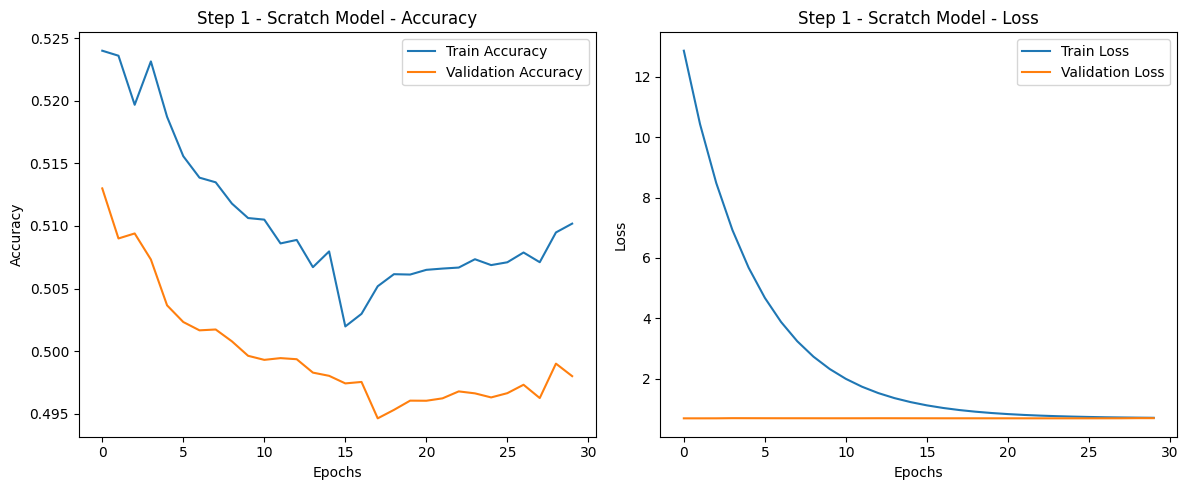

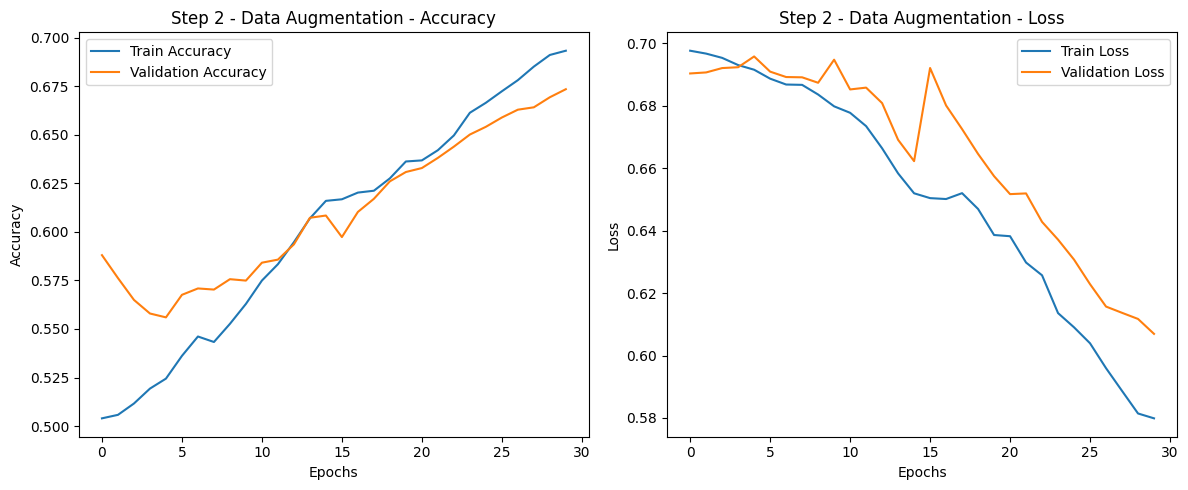

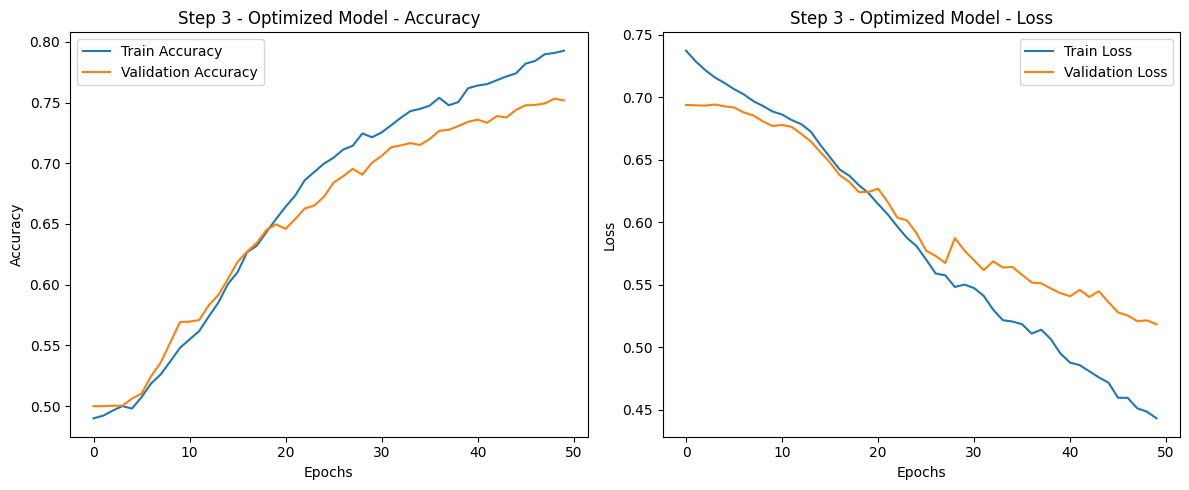

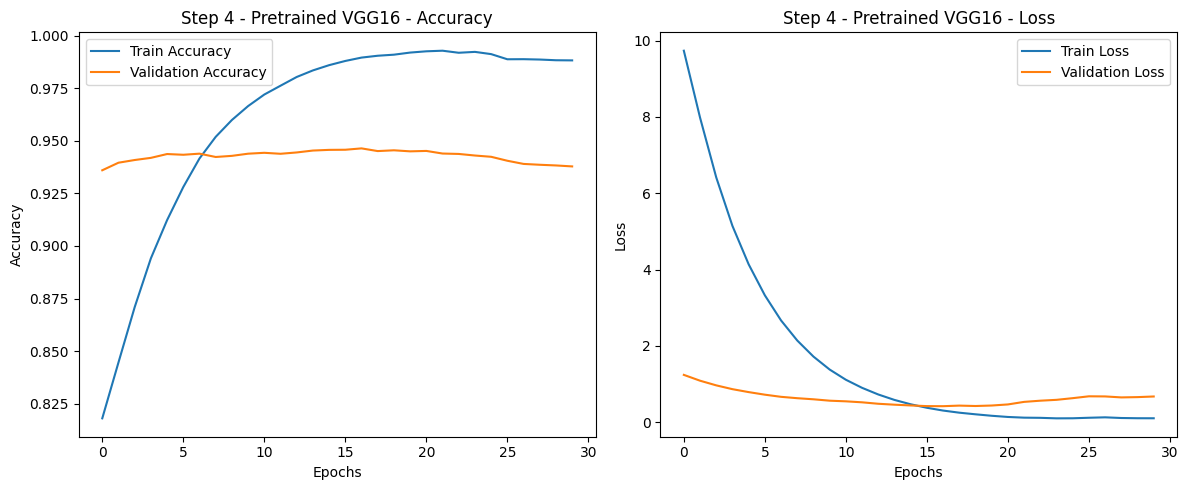

In [ ]:
import matplotlib.pyplot as plt
# Plotting all steps together for comparative analysis
plt.figure(figsize=(15, 10))

def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            smoothed_points.append(smoothed_points[-1] * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# List of history variables and titles
history_list = [
    (history_scratch_1000, "Step 1 - Scratch Model"),
    (history_augmentation, "Step 2 - Data Augmentation"),
    (history_optimized, "Step 3 - Optimized Model"),
    (history_pretrained, "Step 4 - Pretrained VGG16")
]

# Plot training and validation metrics for each step
for history, title in history_list:
    plt.figure(figsize=(12, 5))

    # Plot smoothed accuracy
    plt.subplot(1, 2, 1)
    plt.plot(smooth_curve(history.history["accuracy"]), label="Train Accuracy")
    plt.plot(smooth_curve(history.history["val_accuracy"]), label="Validation Accuracy")
    plt.title(f"{title} - Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot smoothed loss
    plt.subplot(1, 2, 2)
    plt.plot(smooth_curve(history.history["loss"]), label="Train Loss")
    plt.plot(smooth_curve(history.history["val_loss"]), label="Validation Loss")
    plt.title(f"{title} - Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()


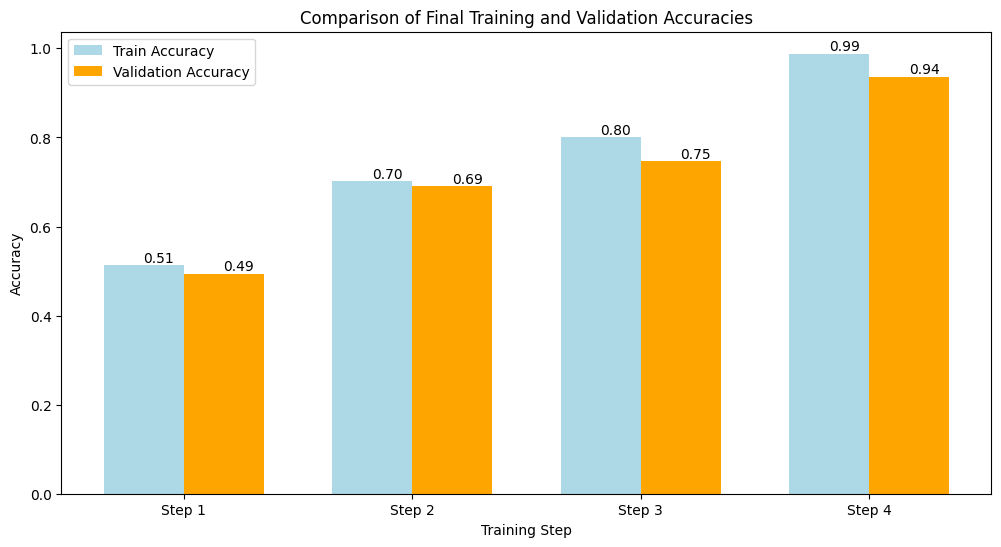

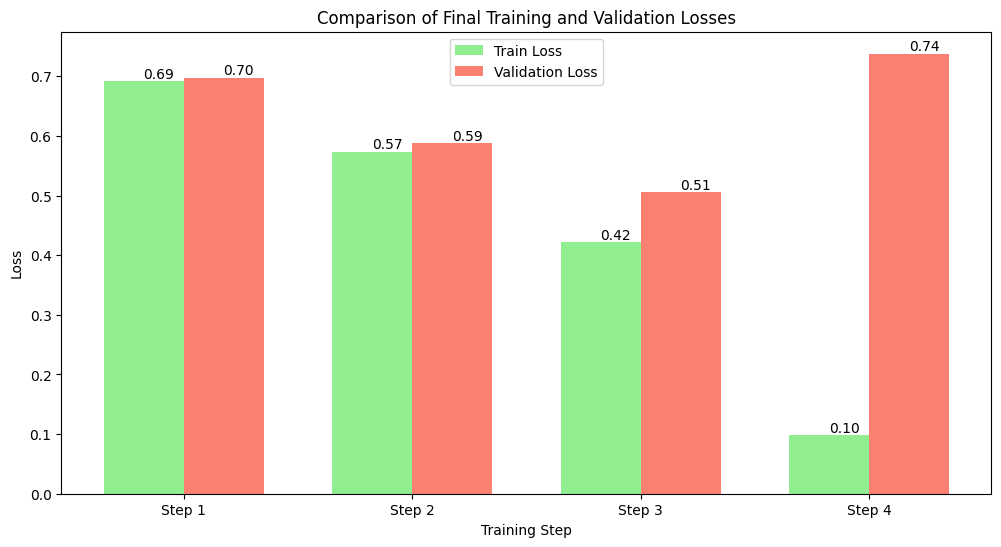

In [ ]:

# Extracting final accuracies and losses from each history object
final_train_accuracies = [
    history_scratch_1000.history["accuracy"][-1],
    history_augmentation.history["accuracy"][-1],
    history_optimized.history["accuracy"][-1],
    history_pretrained.history["accuracy"][-1]
]

final_val_accuracies = [
    history_scratch_1000.history["val_accuracy"][-1],
    history_augmentation.history["val_accuracy"][-1],
    history_optimized.history["val_accuracy"][-1],
    history_pretrained.history["val_accuracy"][-1]
]

final_train_losses = [
    history_scratch_1000.history["loss"][-1],
    history_augmentation.history["loss"][-1],
    history_optimized.history["loss"][-1],
    history_pretrained.history["loss"][-1]
]

final_val_losses = [
    history_scratch_1000.history["val_loss"][-1],
    history_augmentation.history["val_loss"][-1],
    history_optimized.history["val_loss"][-1],
    history_pretrained.history["val_loss"][-1]
]

# Labels for the steps
labels = ["Step 1", "Step 2", "Step 3", "Step 4"]

# Bar plot for accuracies
x = range(len(labels))
width = 0.35  # Width of the bars

plt.figure(figsize=(12, 6))
bars_train_acc = plt.bar(x, final_train_accuracies, width, label='Train Accuracy', color='lightblue')
bars_val_acc = plt.bar([p + width for p in x], final_val_accuracies, width, label='Validation Accuracy', color='orange')

# Adding text annotations for accuracy values
for bar in bars_train_acc:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # Text for training accuracy

for bar in bars_val_acc:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # Text for validation accuracy

plt.xlabel('Training Step')
plt.ylabel('Accuracy')
plt.title('Comparison of Final Training and Validation Accuracies')
plt.xticks([p + width/2 for p in x], labels)
plt.legend()
plt.show()

# Bar plot for losses
plt.figure(figsize=(12, 6))
bars_train_loss = plt.bar(x, final_train_losses, width, label='Train Loss', color='lightgreen')
bars_val_loss = plt.bar([p + width for p in x], final_val_losses, width, label='Validation Loss', color='salmon')

# Adding text annotations for loss values
for bar in bars_train_loss:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # Text for training loss

for bar in bars_val_loss:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', va='bottom')  # Text for validation loss

plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Comparison of Final Training and Validation Losses')
plt.xticks([p + width/2 for p in x], labels)
plt.legend()
plt.show()
